In [1]:
import pandas as pd

In [2]:
source_df = pd.read_csv("../csvs/Iris.csv")
source_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = source_df.drop(['Species'], axis=1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np 
X = df.values[:,1:]
X = np.nan_to_num(X)

In [5]:
from sklearn.cluster import KMeans
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [6]:
df["Clus_km"] = labels
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clus_km
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [7]:
df[['Id', 'Clus_km']]

,Id,Clus_km
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
145,146,0
146,147,2
147,148,0
148,149,0


In [8]:
# df.to_csv("iris_kmeans_res.csv", index=False)

In [9]:
mapping_dict = { 0: 'Iris-virginica', 1: 'Iris-setosa', 2:'Iris-versicolor'}
source_df["Km_label"] = [mapping_dict[x] for x in df['Clus_km']]
source_df['eq'] = np.where(source_df["Species"] == source_df["Km_label"], True, False)
source_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Km_label,eq
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,True
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,True
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,True
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,True
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,True
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,True
146,147,6.3,2.5,5.0,1.9,Iris-virginica,Iris-versicolor,False
147,148,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,True
148,149,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica,True


In [10]:
'accuration : ' + str(round(source_df.loc[source_df['eq'] == True].count()[1] / source_df.shape[0] * 100, 3)) + ' %'

'accuration : 89.333 %'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'SepalWidthCm')

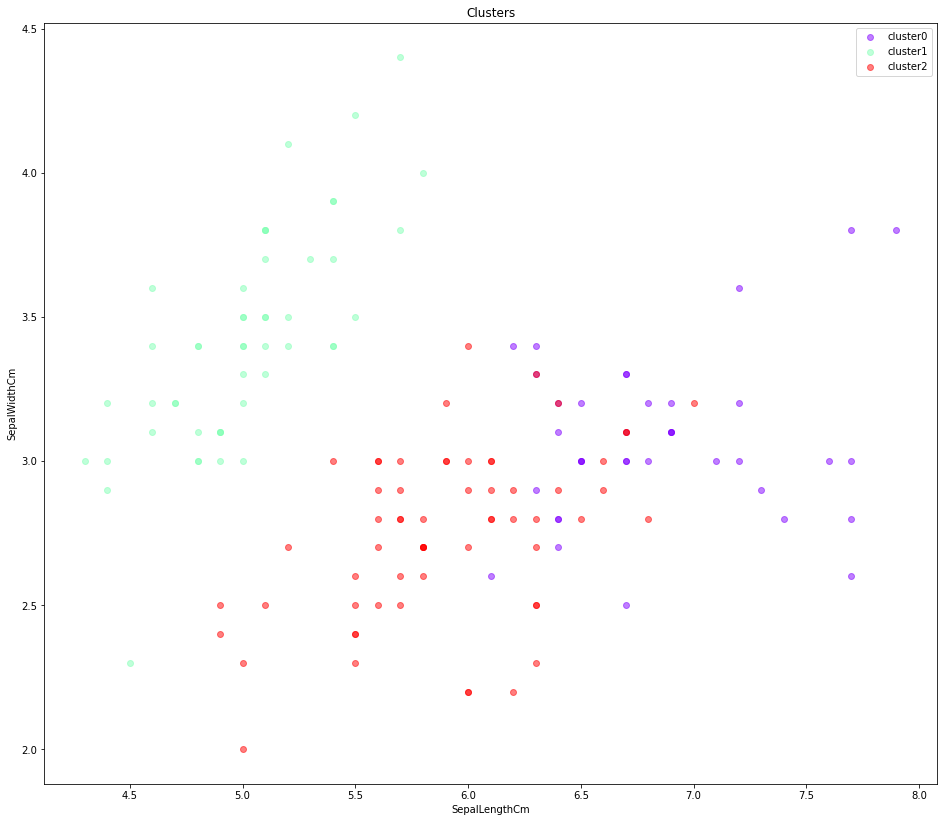

In [11]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

n_clusters = max(labels)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.Clus_km == label]
    plt.scatter(subset.SepalLengthCm, subset.SepalWidthCm, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')